In [57]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm

In [61]:
df=pd.read_csv('vgsales.csv')
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [62]:
#Categorical data, cannot find mean or median, and replacing unknown values with mode might give very inaccurate values
#hence, we are replacing the Unknown Publishers with NaN.
for index,row in df.Publisher.iteritems():
    if(row=="N/A" or row=="Unknown"):
        row=np.nan

In [64]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [65]:
#Dropping all NaN values (there are no unknown numeric values. All NaN values come from the categorical data.)
df=df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
#Genre vs Region
#Platform vs Region
#Platform vs Genre
#Platform vs Genre - grouped bar chart, w/ Global sales  
#Genre vs Year
#Global sales vs Year
#Individual regions Sales vs Year
#Global Sales for each Publisher vs Year - use this to predict sales in future for each company, calculate growth rate(??), compare
#Sales in each for each Publisher vs Year - use this to predict sales in each in future for each company, calculate growth rate(??), compare
#Publisher vs Genre
#Platform vs Year

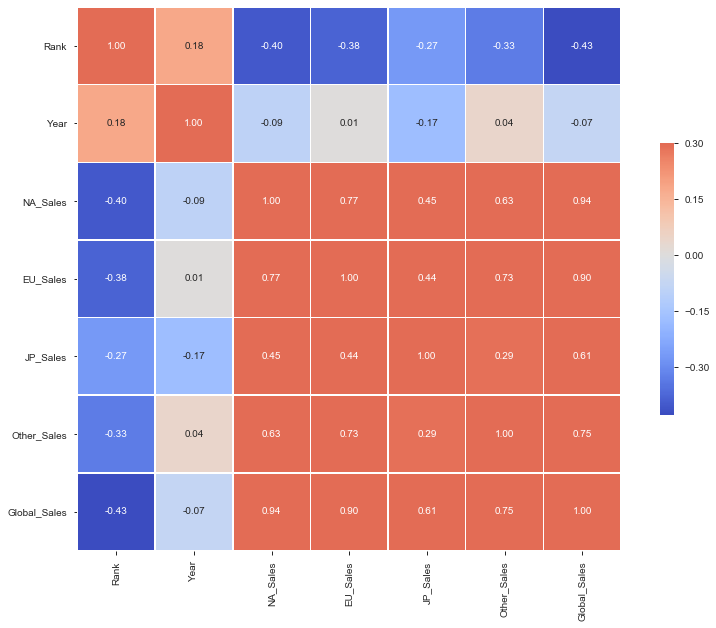

In [8]:
corr = df.corr()
g = sb.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sb.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [9]:
#number of unique Platforms
l=df.Platform.unique()
print(type(l))
len(l)

<class 'numpy.ndarray'>


31

In [10]:
#Number of Unique Genres
list=df.Genre.unique()
len(list)

12

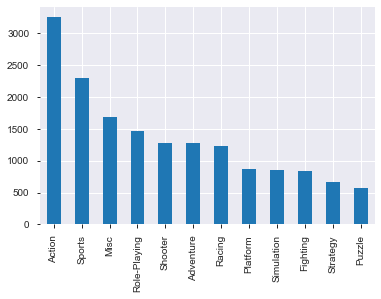

In [11]:
#Frequency plot for Genre - to find the most popular Genre
df['Genre'].value_counts().plot(kind='bar')

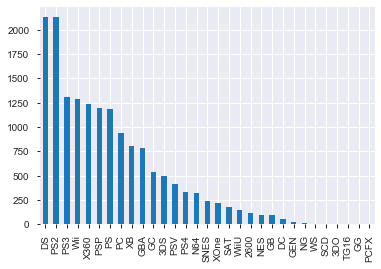

In [12]:
#Frequency plot for Platform - to find the most popular Platform
df['Platform'].value_counts().plot(kind='bar')

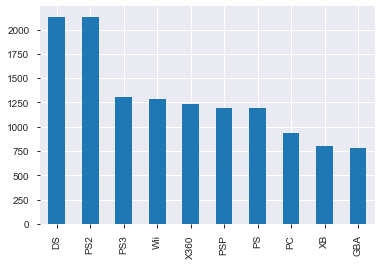

In [13]:
#top 10 platforms
df['Platform'].value_counts(sort=True)[:10].plot(kind='bar')

Text(0, 0.5, 'Sales')

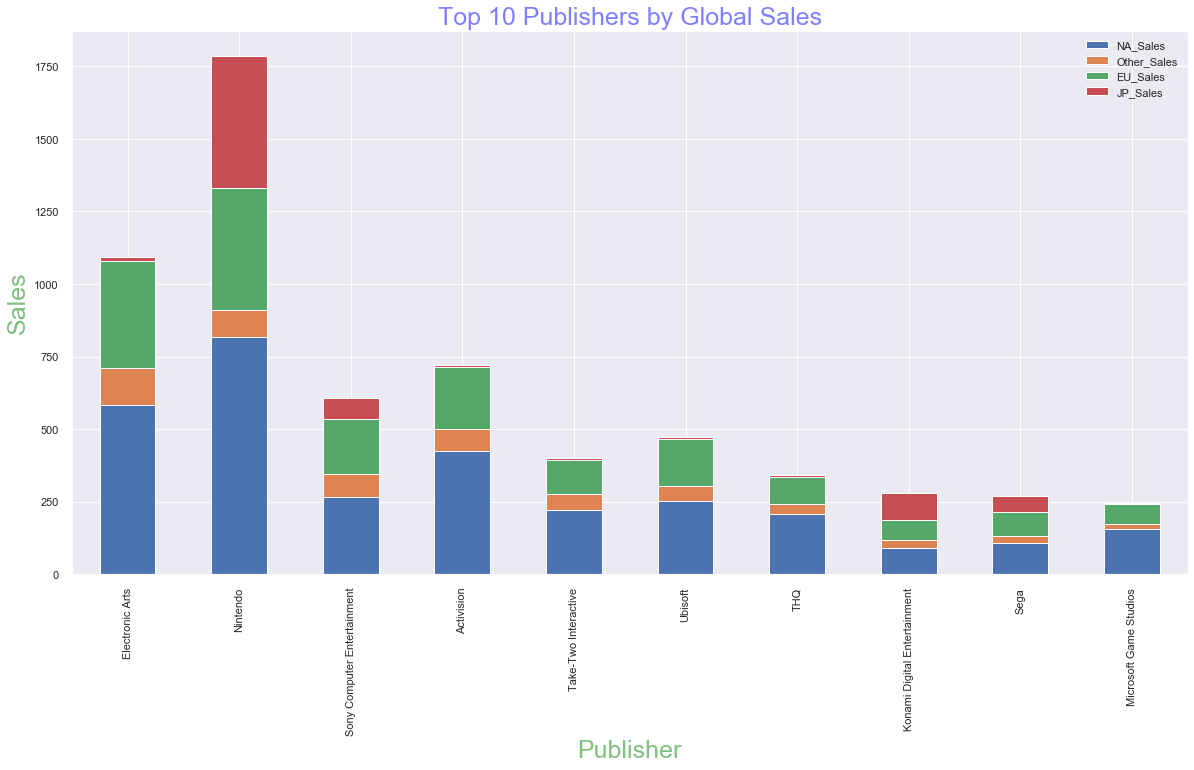

In [52]:
global_sales_publisher = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True)
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

Text(0, 0.5, 'Sales')

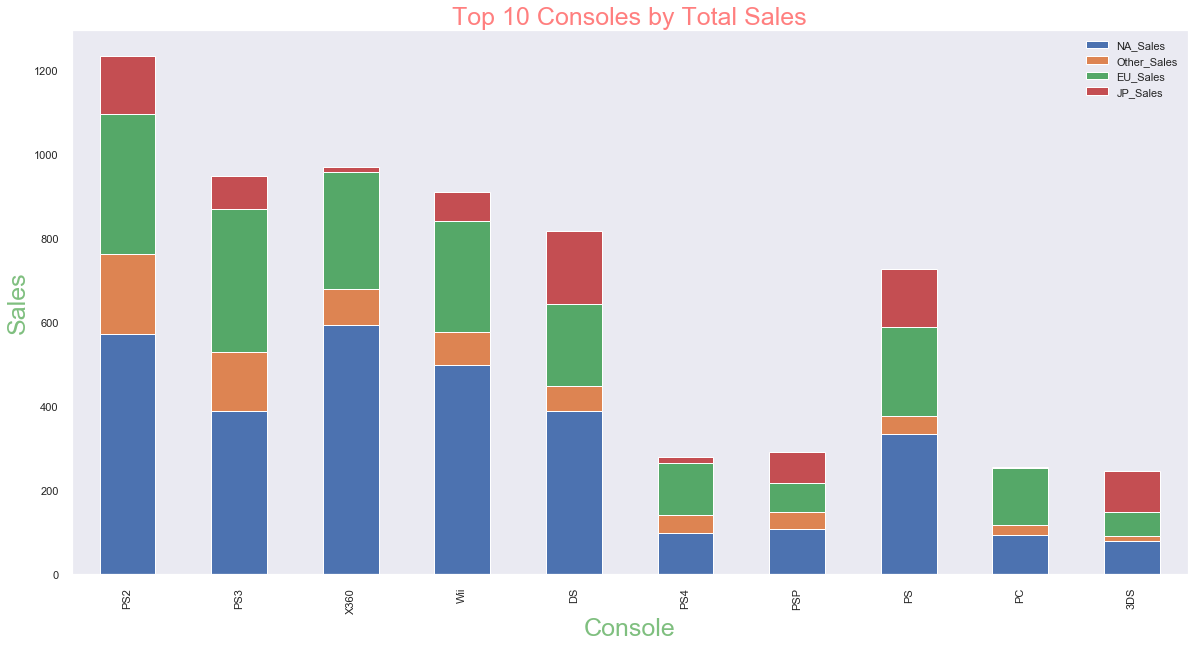

In [53]:
global_pub = df.pivot_table(index=['Platform'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'],
                                          aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Consoles by Total Sales', size=25, color='red', alpha=0.5)
ax.set_xlabel('Console', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

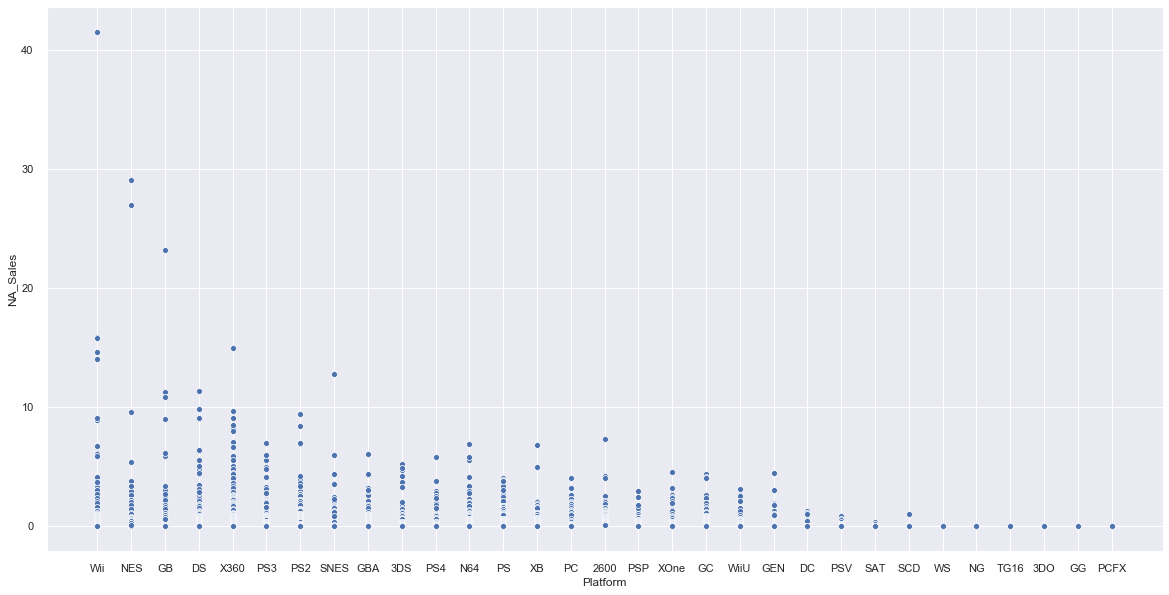

In [49]:
sb.set(rc={'figure.figsize':(20,10)})
sb.scatterplot(x ='Platform', y ='NA_Sales', data = df)

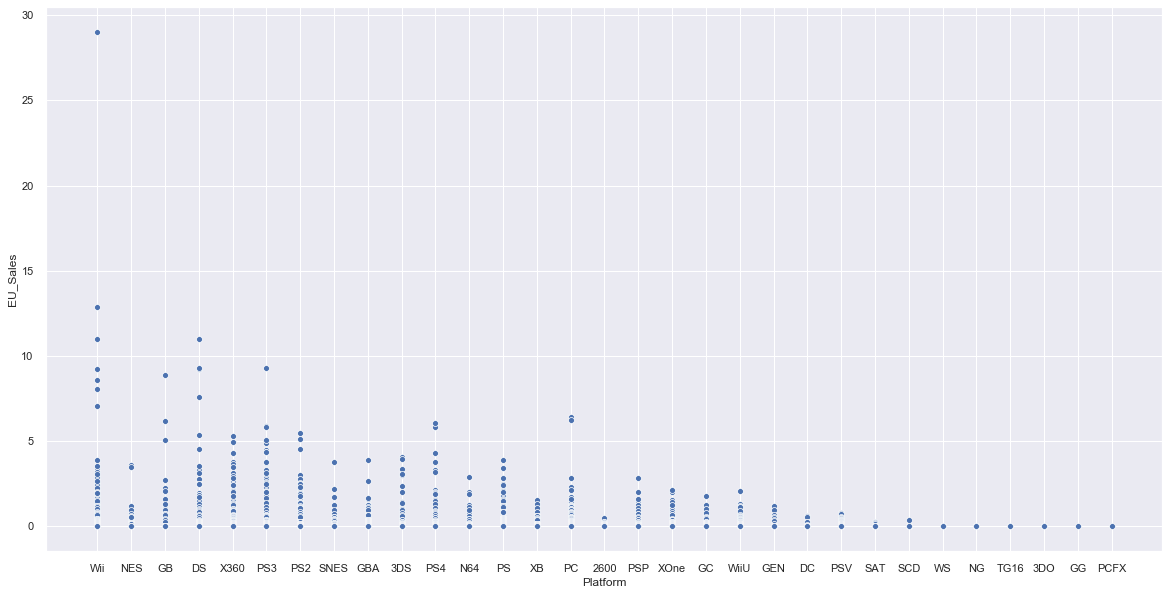

In [50]:
sb.set(rc={'figure.figsize':(20,10)})
sb.scatterplot(x ='Platform', y ='EU_Sales', data = df)

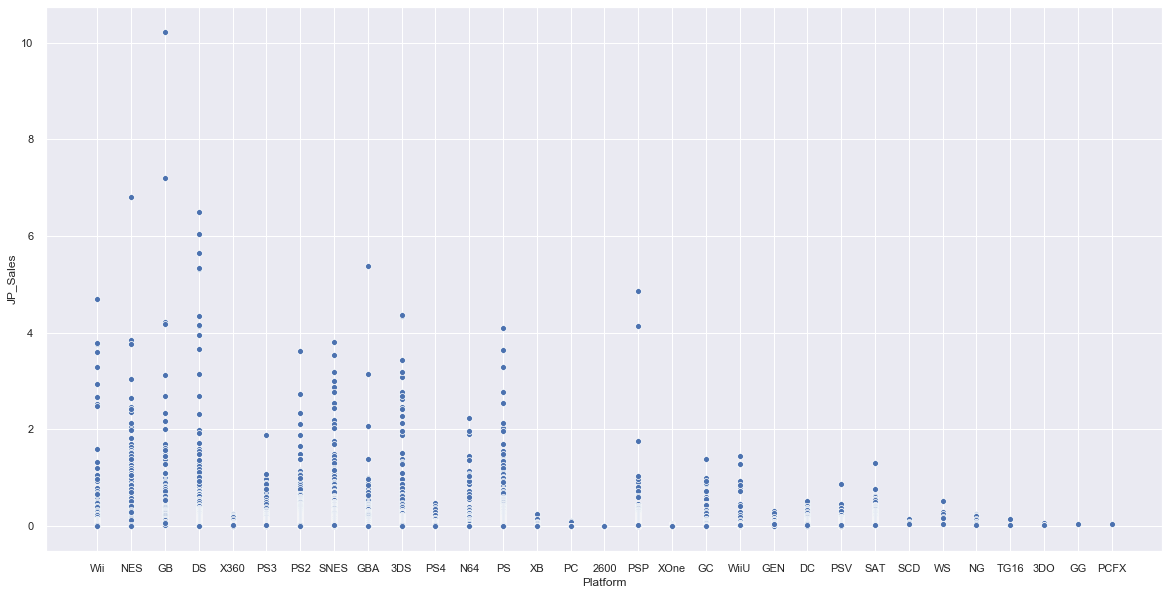

In [51]:
sb.set(rc={'figure.figsize':(20,10)})
sb.scatterplot(x ='Platform', y ='JP_Sales', data = df)

<Figure size 1800x1440 with 0 Axes>

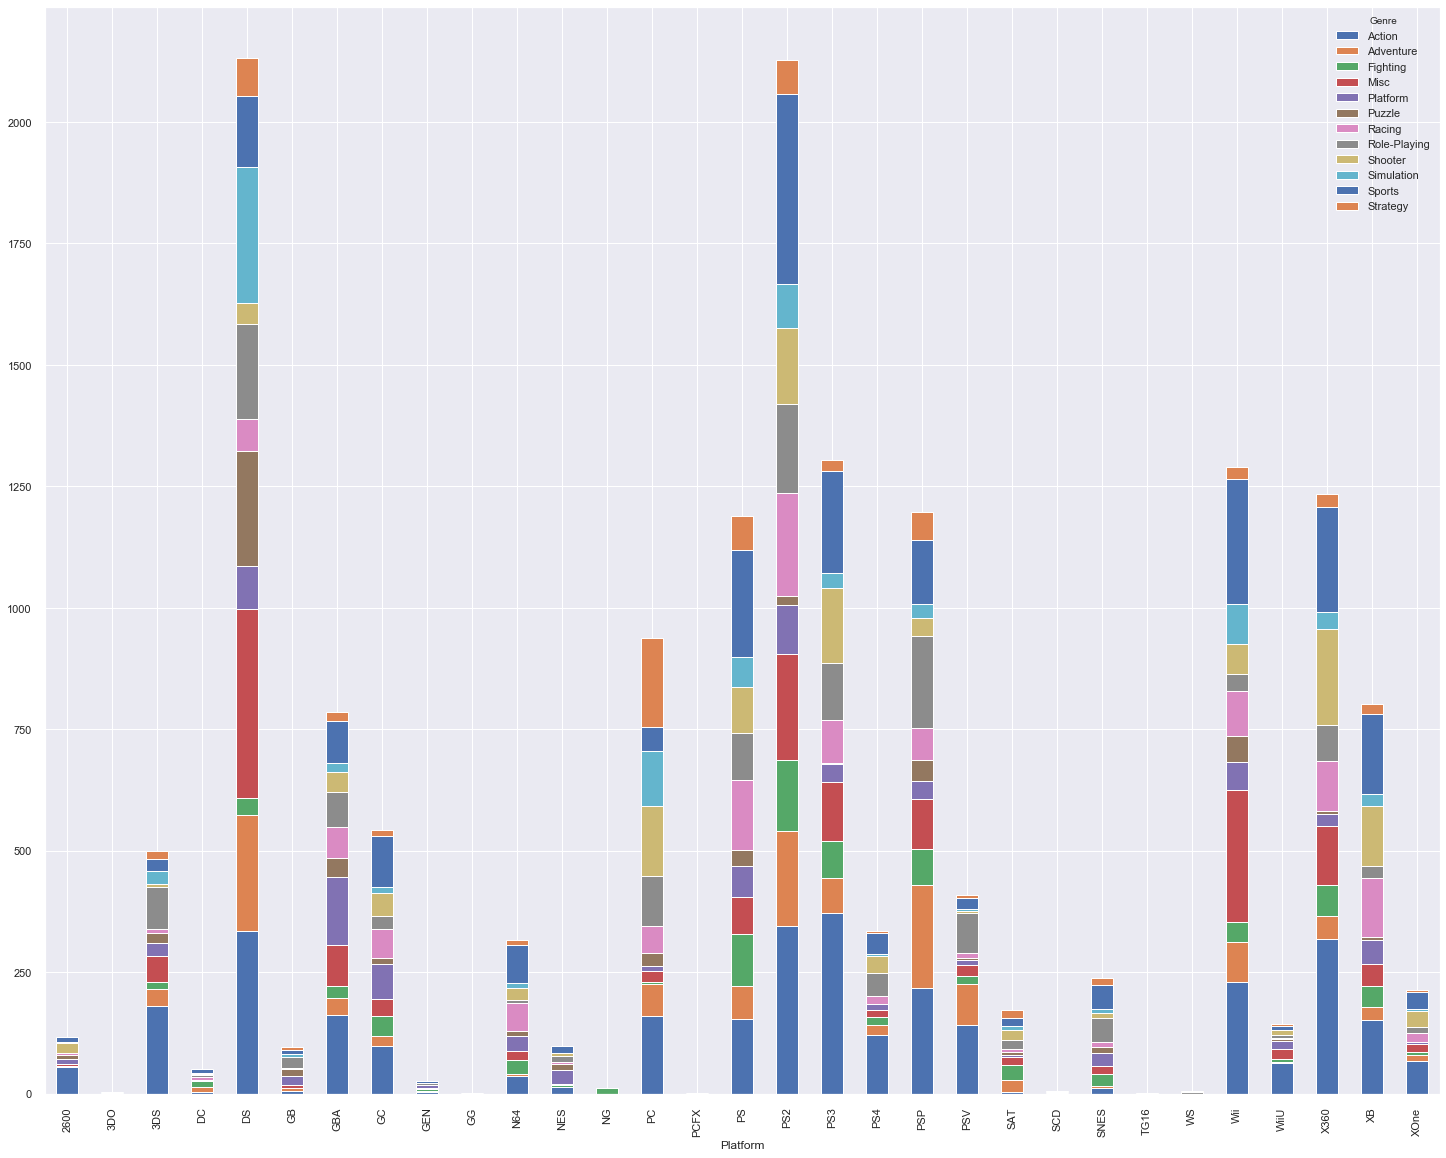

In [74]:
platGenre = pd.crosstab(df.Platform,df.Genre)
plt.figure()
platGenre.plot.bar(stacked=True)
plt.rcParams["figure.figsize"] = (30,30)
plt.show()